<a href="https://colab.research.google.com/github/Marveai/Disease-prediction/blob/main/Another_copy_of_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"olanipekunmarvellous","key":"401f3d3f4a005d21f7f4898fd7395cce"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 41.6MB/s]


In [ ]:
!unzip -qq "heart-disease-data"

In [ ]:
import pandas as pd
df = pd.read_csv('heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

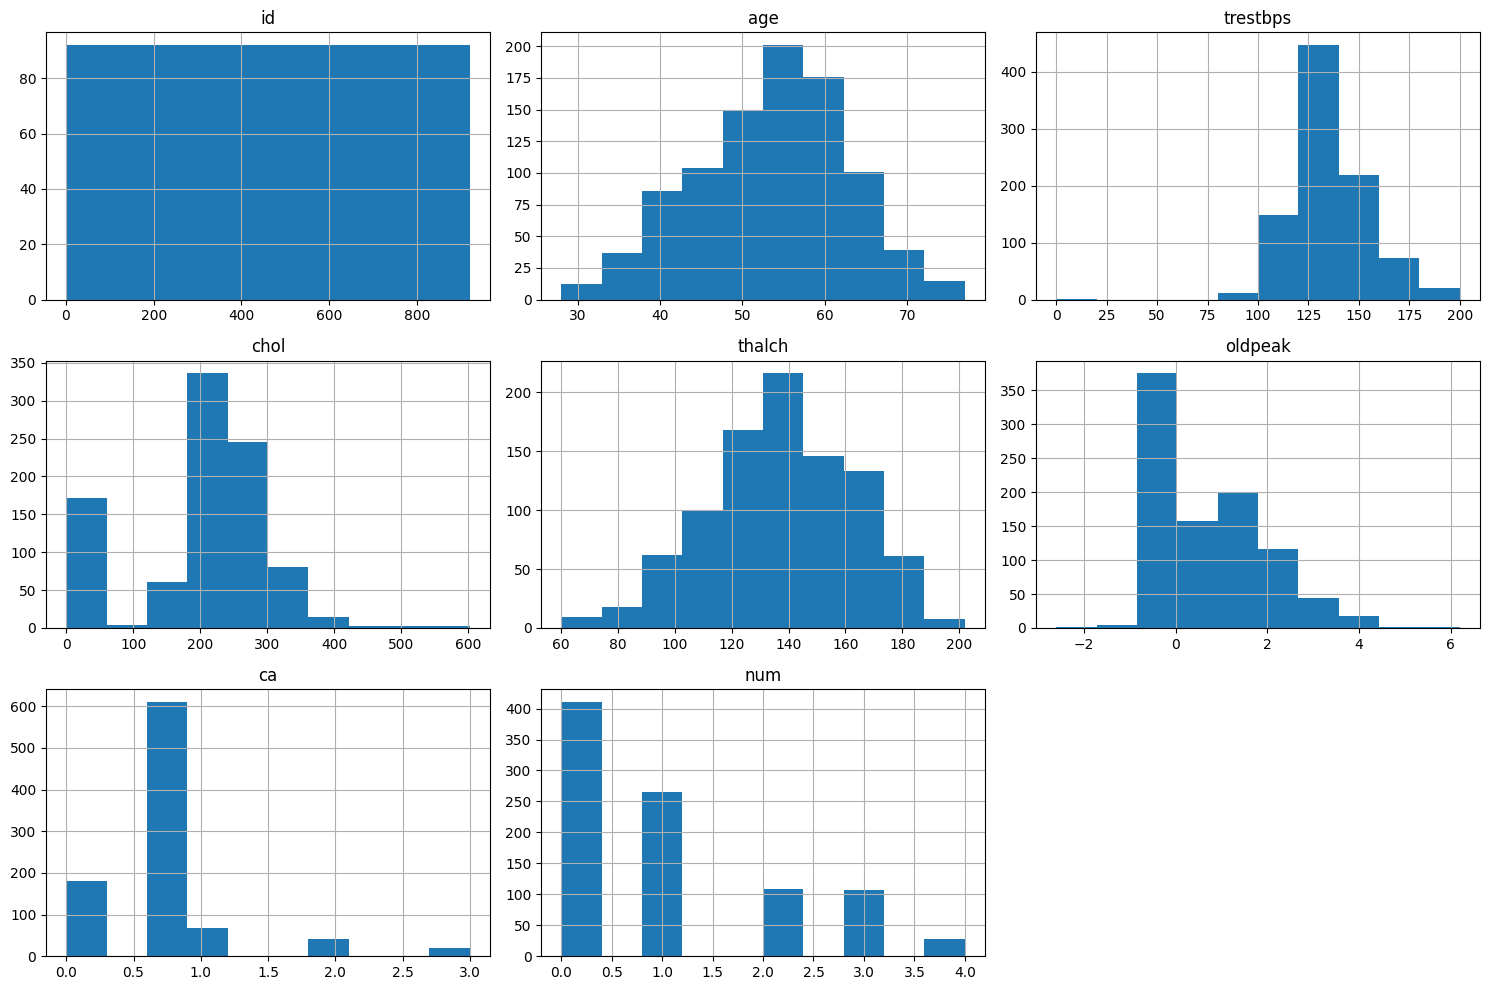

In [ ]:
df[numeric_cols].hist(figsize= (15,10))
plt.tight_layout()

Text(0.5, 1.0, 'Numeric Column Correlation')

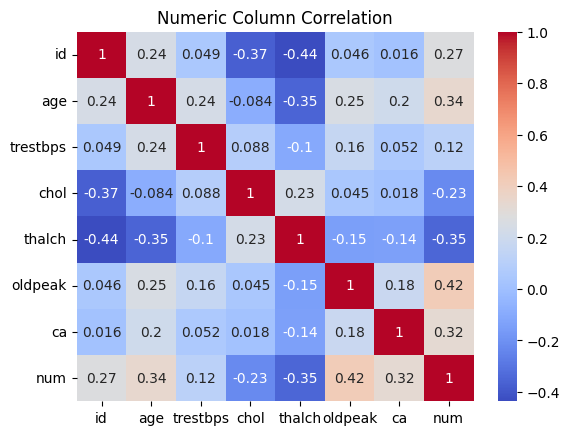

In [ ]:
sns.heatmap(df[numeric_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Numeric Column Correlation')

In [ ]:
df[numeric_cols].corr()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.049369,-0.372984,-0.436795,0.046473,0.016474,0.273552
age,0.239301,1.000000,0.235253,-0.084499,-0.353471,0.248082,0.204139,0.339596
trestbps,0.049369,0.235253,1.000000,0.088290,-0.104616,0.160268,0.051940,0.116225
chol,-0.372984,-0.084499,0.088290,1.000000,0.226325,0.045498,0.017544,-0.228238
thalch,-0.436795,-0.353471,-0.104616,0.226325,1.000000,-0.149630,-0.140644,-0.351055
oldpeak,0.046473,0.248082,0.160268,0.045498,-0.149630,1.000000,0.178886,0.421907
ca,0.016474,0.204139,0.051940,0.017544,-0.140644,0.178886,1.000000,0.321404
num,0.273552,0.339596,0.116225,-0.228238,-0.351055,0.421907,0.321404,1.000000


In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [ ]:
X = df.drop('num', axis = 1)
y = (df['num'] > 0).astype(int)

In [ ]:
X = pd.get_dummies(X, columns = cat_cols)
print("Final features columns:",X.columns)

Final features columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y_pred = model.predict(scaled_X_test)
print('Logistic Regression Accuracy:',accuracy_score(y_test, y_pred))
print('Logistic Regression Accuracy:', classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.842391304347826
Logistic Regression Accuracy:               precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix')

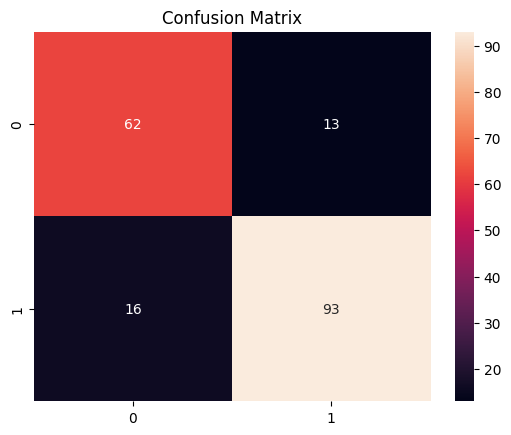

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(scaled_X_train, y_train)
y_pred_rf = rf_model.predict(scaled_X_test)
print('RandomForestClassifier:',accuracy_score(y_test, y_pred_rf))
print('RandomForestClassifier:', classification_report(y_test, y_pred_rf))

RandomForestClassifier: 0.875
RandomForestClassifier:               precision    recall  f1-score   support

           0       0.84      0.85      0.85        75
           1       0.90      0.89      0.89       109

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



Text(0.5, 1.0, 'Random Forest feature importance')

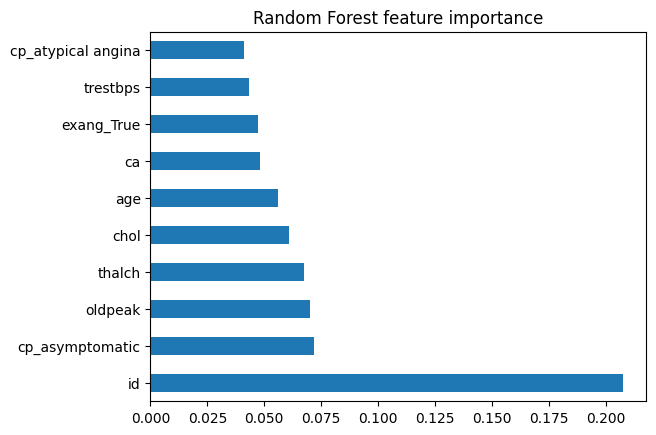

In [ ]:
feat_imp = pd.Series(rf_model.feature_importances_, index = X.columns)
feat_imp.nlargest(10).plot(kind = 'barh')
plt.title('Random Forest feature importance')

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [ ]:
sample =  X.head()
sample.to_csv('Heart_user_template.csv', index = False)
print('User_template saved as "Heart_user_template.csv"')

User_template saved as "Heart_user_template.csv"


In [ ]:
user_df = pd.read_csv('Heart_user_template.csv')

# Identify column types from the original dataframe
cat_col = df.select_dtypes(include='object').columns.tolist()
numeric_col = df.select_dtypes(include='number').columns.tolist()
bool_col = df.select_dtypes(include='bool').columns.tolist()

# Remove the target variable 'num' if it exists in any list
if 'num' in numeric_col:
    numeric_col.remove('num')
if 'num' in cat_col:
    cat_col.remove('num')
if 'num' in bool_col:
    bool_col.remove('num')


# Ensure only columns present in user_df are selected
numeric_col_user = [col for col in numeric_col if col in user_df.columns]
cat_col_user = [col for col in cat_col if col in user_df.columns]
bool_col_user = [col for col in bool_col if col in user_df.columns]

# Fill missing numerical values with the mean from the original training data
user_df[numeric_col_user] = user_df[numeric_col_user].fillna(df[numeric_col_user].mean())

# Fill missing categorical values with a placeholder like "Unknown"
for col in cat_col_user:
    user_df[col] = user_df[col].fillna("Unknown")

# Convert boolean columns to integer type (assuming True=1, False=0)
for col in bool_col_user:
    # Check if the column exists in user_df before attempting to convert
    if col in user_df.columns:
        user_df[col] = user_df[col].astype(int)


# One-hot encode categorical columns in the user data, aligning with training data columns
user_df_encoded = pd.get_dummies(user_df, columns = cat_col_user)

# Reindex the encoded user data to match the columns of the training data X
user_df_encoded = user_df_encoded.reindex(columns = X.columns, fill_value = 0)

# Load the saved scaler and model
scaler = joblib.load("heart_scaler.pkl")
model = joblib.load("model.pkl")

# Scale the user data
user_df_scaled = scaler.transform(user_df_encoded)

# Make predictions
preds = model.predict(user_df_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)

   id  age  trestbps   chol  thalch  oldpeak   ca  sex_Female  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3  0.0       False      True   
1   2   67     160.0  286.0   108.0      1.5  3.0       False      True   
2   3   67     120.0  229.0   129.0      2.6  2.0       False      True   
3   4   37     130.0  250.0   187.0      3.5  0.0       False      True   
4   5   41     130.0  204.0   172.0      1.4  0.0        True     False   

   dataset_Cleveland  ...  restecg_st-t abnormality  exang_False  exang_True  \
0               True  ...                     False         True       False   
1               True  ...                     False        False        True   
2               True  ...                     False        False        True   
3               True  ...                     False         True       False   
4               True  ...                     False         True       False   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect